In [1]:
import keras
from keras.models import Sequential
# from keras.layers.convolutional import Conv3D
# from keras.layers.convolutional_recurrent import ConvLSTM2D
# from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras.layers import Dense, Reshape, TimeDistributed, Flatten
from keras.layers import LSTM
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import MaxPooling2D
import tensorflow as tf

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

(20, 10000, 64, 64)
(10000, 20, 64, 64)


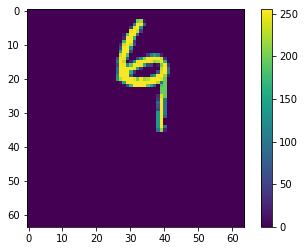

(9900, 10, 64, 64, 1)
(9900, 10, 64, 64, 1)
(9900, 64, 64, 1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [13]:
data = np.load("MNIST_test_seq.npy")
print(data.shape)

data = np.swapaxes(data, 0, 1)

print(data.shape)


data_test_input = data[100:10000, :10, :, :]
data_test_output = data[100:10000, 10, :, :]

data_actual_test_input = data[0:100, :10, :, :]
data_actual_test_output = data[0:100, 10, :, :]

plt.imshow(data_test_input[4][0])
plt.colorbar()
plt.show()

#Scaling values between -1 and 1
data_test_input = (data_test_input - 127.5) / 255.0
data_test_output = (data_test_output - 127.5) / 255.0
data_actual_test_input = (data_actual_test_input - 127.5) / 255.0
data_actual_test_output = (data_actual_test_output - 127.5) / 255.0


#Adding Channels of dimension 1 IMPORTANT if using CNNs
data_test_input = np.expand_dims(data_test_input, axis=4)
data_test_output = np.expand_dims(data_test_output, axis=4)
data_actual_test_input = np.expand_dims(data_actual_test_input, axis=4)
data_actual_test_output = np.expand_dims(data_actual_test_output, axis=4)

print(data_test_input.shape)

print(data_test_input.shape)
print(data_test_output.shape)


In [3]:
model = Sequential()
#TimeDistributed(Dense(2048, activation='relu')), input_shape=(10, 4096))
#Conv2D(filters, kernel_size, strides=(1, 1), padding='valid'
model.add(TimeDistributed(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='same',activation='elu'), input_shape=(10,64,64,1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='elu'), input_shape=(10,32,32,32)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten(),input_shape=(10,16,16,16)))
model.add(TimeDistributed(Dense(512)))
model.add(LSTM(units=512, input_shape=(10, 512)))
model.add(Dense(4096))
model.add(Reshape((16,16,16)))
model.add(Conv2DTranspose(filters=32,kernel_size=(3,3), strides=(2, 2), padding='same',activation='elu'))
model.add(Conv2DTranspose(filters=16,kernel_size=(3,3), strides=(2, 2), padding='same',activation='elu'))
model.add(Conv2D(filters=16,kernel_size=(3,3), strides=(1, 1), padding='same',activation='elu'))
model.add(Conv2D(filters=1,kernel_size=(3,3), strides=(1, 1), padding='same',activation='tanh'))
model.compile(loss="mean_squared_error", optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 10, 64, 64, 32)    832       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 32, 32, 32)    0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 32, 32, 16)    4624      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 10, 16, 16, 16)    0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 4096)          0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 512)           2097664   
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)             

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 10, 64, 64, 32)    832       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 32, 32, 32)    0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 32, 32, 16)    4624      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 10, 16, 16, 16)    0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 4096)          0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 512)           2097664   
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)              

Epoch 1/1
9900/9900 [==============================] - 141s 14ms/step - loss: 0.0229
0


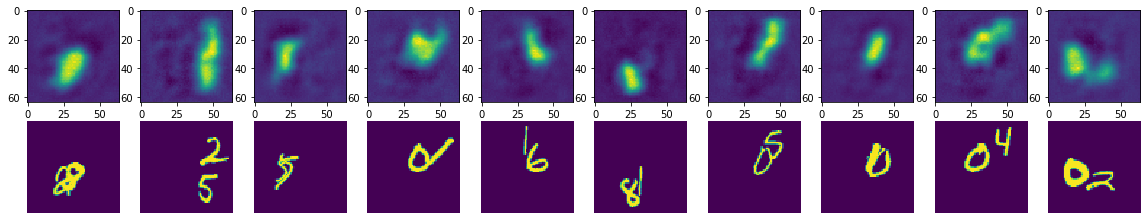

Epoch 1/1
9900/9900 [==============================] - 138s 14ms/step - loss: 0.0224
1


<Figure size 432x288 with 0 Axes>

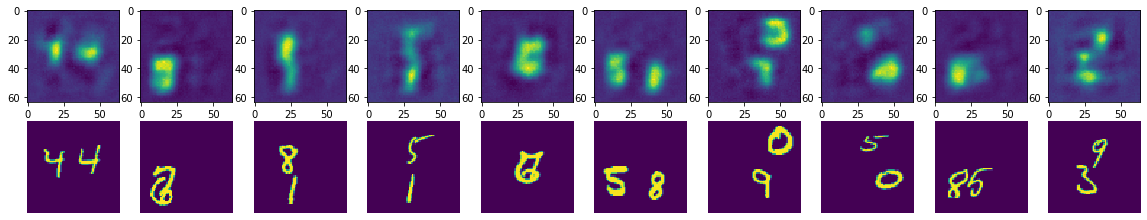

Epoch 1/1
9900/9900 [==============================] - 139s 14ms/step - loss: 0.0219
2


<Figure size 432x288 with 0 Axes>

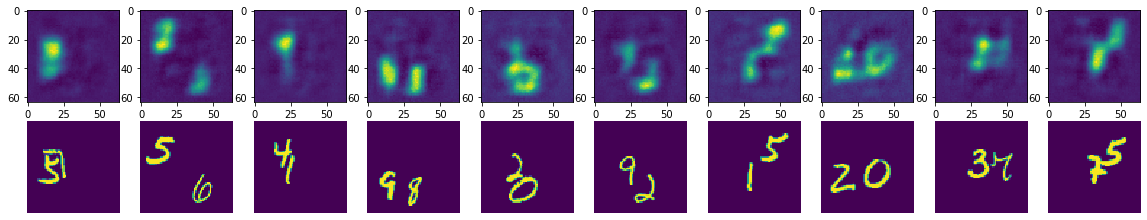

Epoch 1/1
9900/9900 [==============================] - 138s 14ms/step - loss: 0.0214
3


<Figure size 432x288 with 0 Axes>

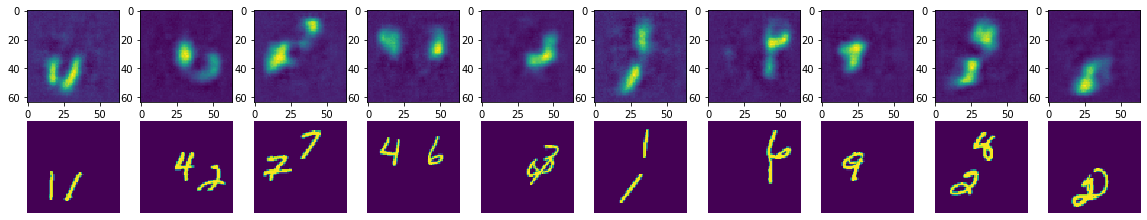

Epoch 1/1
9900/9900 [==============================] - 140s 14ms/step - loss: 0.0208
4


<Figure size 432x288 with 0 Axes>

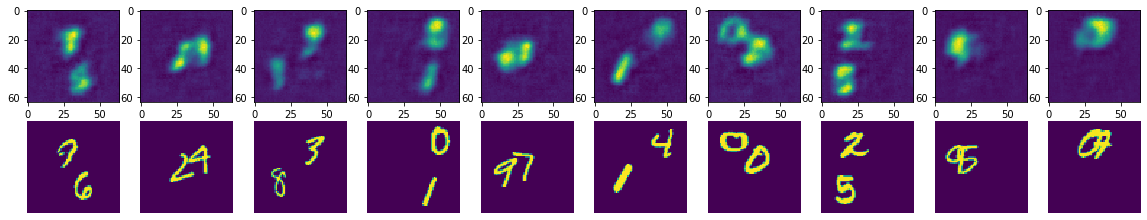

Epoch 1/1
9900/9900 [==============================] - 140s 14ms/step - loss: 0.0204
5


<Figure size 432x288 with 0 Axes>

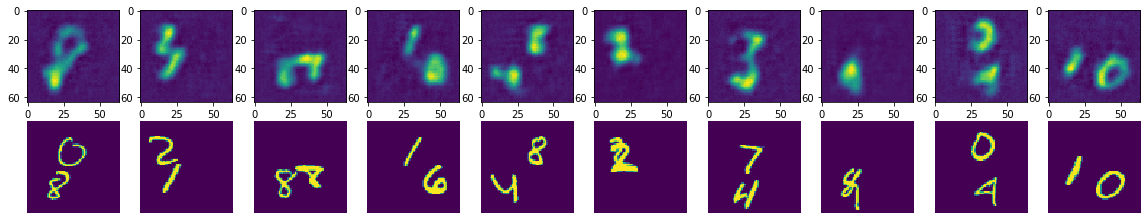

Epoch 1/1
9900/9900 [==============================] - 142s 14ms/step - loss: 0.0200
6


<Figure size 432x288 with 0 Axes>

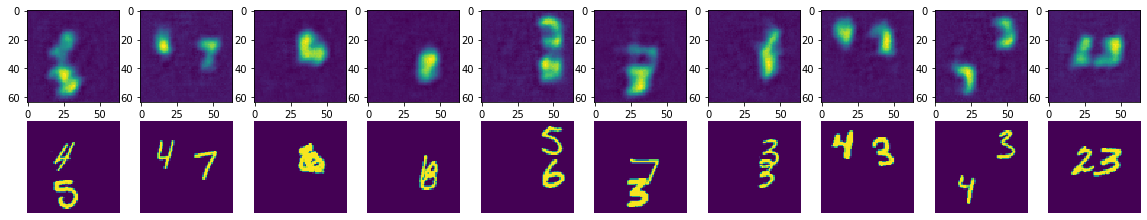

Epoch 1/1
9900/9900 [==============================] - 139s 14ms/step - loss: 0.0196
7


<Figure size 432x288 with 0 Axes>

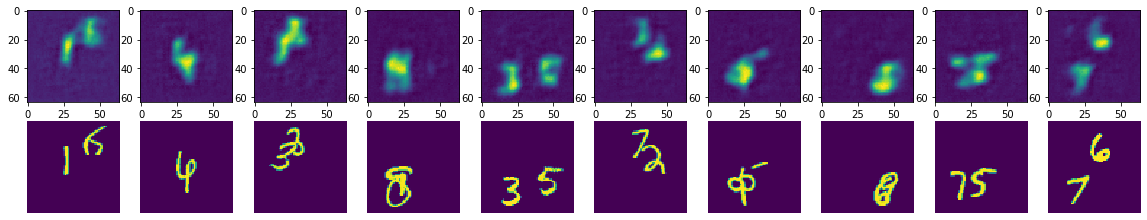

Epoch 1/1
9900/9900 [==============================] - 139s 14ms/step - loss: 0.0192
8


<Figure size 432x288 with 0 Axes>

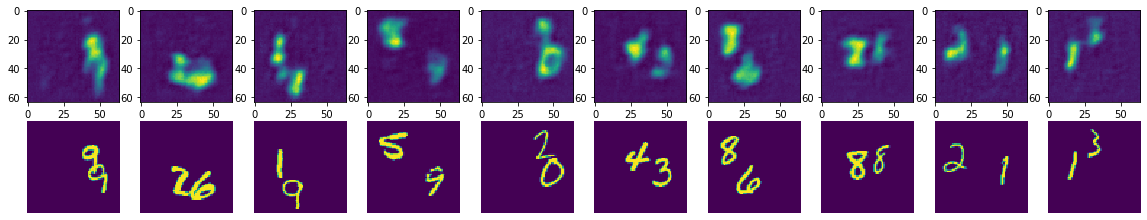

Epoch 1/1
4600/9900 [============>.................] - ETA: 1:15 - loss: 0.0186

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [15]:
for epoch in range(15):
    model.fit(data_test_input, data_test_output, batch_size=200,
        epochs=1)
    print(epoch)
    inputs = data_test_input[epoch*10:(epoch+1)*10]
    ground_truth = data_test_output[epoch*10:(epoch+1)*10]
    predictions = model.predict(inputs)
    predictions = predictions.reshape(10,64,64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()

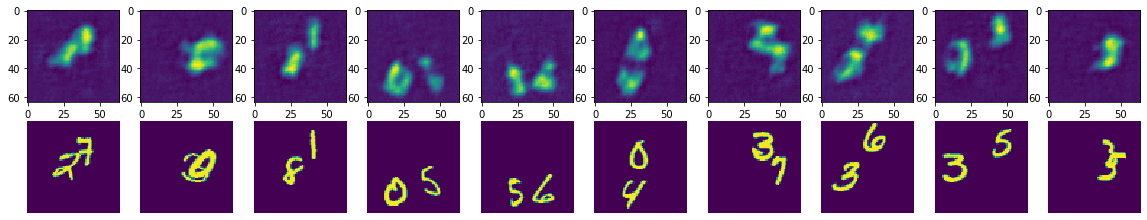

<Figure size 432x288 with 0 Axes>

In [16]:
inputs = data_actual_test_input[:10]
ground_truth = data_actual_test_output[0:10]

predictions = model.predict(inputs)
predictions = predictions.reshape(10,64,64)
ground_truth = ground_truth.reshape(10, 64, 64)
plt.figure(figsize=(20, 20))
for i in range(predictions.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(predictions[i], interpolation='nearest')
    plt.subplot(10, 10, 10+i+1)
    plt.imshow(ground_truth[i], interpolation='nearest')
    plt.axis('off')
plt.show()
plt.tight_layout()

In [ ]:
for epoch in range (10):
    inputs = data_training_input[epoch*10:(epoch+1)*10]
    ground_truth = data_training_output[epoch*10:(epoch+1)*10]
    predictions = model.predict(inputs)
    predictions = predictions.reshape(10,64,64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()

In [ ]:

for epoch in range(50):
    model.fit(data_test_input, data_test_output, batch_size=200,
        epochs=1)
    print(epoch)
    inputs = data_test_input[epoch*10:(epoch+1)*10]
    ground_truth = data_test_output[epoch*10:(epoch+1)*10]
    predictions = model.predict(inputs)
    predictions = predictions.reshape(10,64,64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()

In [1]:
model.summary()

NameError: name 'model' is not defined